# ADA - Project Milestone P2
The jupyter notebook presenting our initial results.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# general helpers
def ratio_to_percentage(ratio):
    """
    
    :param ratio: a number between 0 and 1
    :return: the corresponding percentage with two decimal places
    """
    return round(ratio * 100, 2)

In [5]:
df_ba_users = pd.read_csv("data/BeerAdvocate/users.csv")
df_rb_users = pd.read_csv("data/RateBeer/users.csv")

exp_threshold = 15

df_ba_experienced_users = df_ba_users[df_ba_users["nbr_ratings"] > exp_threshold]
df_rb_experienced_users = df_rb_users[df_rb_users["nbr_ratings"] > exp_threshold]

In [6]:
num_users_ba = len(df_ba_users)
num_exp_users_ba = len(df_ba_experienced_users)
num_users_rb = len(df_rb_users)
num_exp_users_rb = len(df_rb_experienced_users)

perc_ba = 100 - ratio_to_percentage(num_exp_users_ba / num_users_ba)
print("By filtering the datasets, we lost " + str(perc_ba) + "% (" + str(num_users_ba - num_exp_users_ba) + "/" + str(num_users_ba) + ")" + " of the beer advocate dataset")

perc_rb = 100 - ratio_to_percentage(num_exp_users_rb / num_users_rb)
print("By filtering the datasets, we lost " + str(perc_rb) + "% (" + str(num_users_rb - num_exp_users_rb) + "/" + str(num_users_rb) + ")" + " of the rate beer dataset")

perc_both = round((num_users_ba / (num_users_ba + num_users_rb)) * perc_ba + (num_users_rb  / (num_users_rb + num_users_ba)) * perc_rb, 2)
print("Taking both datasets in account we lost " + str(perc_both) + "% (" + str(num_users_ba + num_users_rb - num_exp_users_ba - num_exp_users_rb) + "/" + str(num_exp_users_ba + num_users_rb) + ")" + " of the users")

By filtering the datasets, we lost 74.84% (115025/153704) of the beer advocate dataset
By filtering the datasets, we lost 80.22% (56295/70174) of the rate beer dataset
Taking both datasets in account we lost 76.53% (171320/108853) of the users


# Does the reviewer's rating change over time

In [7]:
# 

# Does the reviewer's rating change for the 10 most popular beers based on the number of reviews given


In [8]:
#Data of interest for this part:
#For the ratings per beer
df_matched_ratings_beers = pd.read_csv(r'data\matched_beer_data\ratings.csv', low_memory=False)
#For the number of given ratings per reviewer
users = pd.read_csv(r'data\matched_beer_data\users.csv')

In [9]:
#Initial interpretation of results:

# From the 10 most rated beer types of the matched BeerAdvocate data, the grading is largely dominated by users that have given more than 15 reviews. In fact, 6 out the 10 beer types used in this analysis have no reviewer below the 15 reviews mark and, for the 4 beer types with reviewers below the threshold, the number of new reviewers does not exceed 7 individuals (from Trappistes 10 Rochefort, whereas the number of experienced reviewers is 142 for that beer). If the 15 threshold is maintained, this implies that the ratings advertised by BeerAdvocate are almost always those of experienced reviewers.
# The low number of new reviewers for the most reviewed beers could be due to a policy of BeerAdvocate to use only reviewers that have given at least 10 ratings, as it is the case for Rate Beer. Otherwise, it could mean that the selected beers are popular amongst a more experienced public or that usually experienced reviewers use the site for ratings.


In [10]:
#Filtering of df_matched_ratings_beers (1), users (2) and merging the 2 df.

#1) The following code creates a new datasets that includes ratings, user_id and beer_name. The dataset is filtered from nan values and its 'object(1)' type of ratings are converted to numerical values.
filtered_df_ratings_beers = df_matched_ratings_beers.dropna()

filtered_overall_beers_ratings_df = pd.DataFrame ({
    'user_id': filtered_df_ratings_beers['ba.15'],
    'ratings': filtered_df_ratings_beers['ba.8'],
    'beer_id': filtered_df_ratings_beers['ba.4']
})

Overall_userid_beers_ratings_df= filtered_overall_beers_ratings_df.drop(0) #Removing first string row which holds no values

#Converting to numerical values:
Overall_userid_beers_ratings_df['ratings'] = pd.to_numeric(Overall_userid_beers_ratings_df['ratings'], errors='coerce')
print(Overall_userid_beers_ratings_df['ratings'].info())

#2) Filtering of the users.csv dataset and merging with the Overall_userid_beers_ratings_df via users_id

#Creating a separate df containing only the wanted columns of ba.2 (nbr_ratings), ba.4 (user_id)
users_df = pd.DataFrame ({
    'nb_ratings': users['ba.2'],
    'user_id': users['ba.4']
})
users_df= users_df.drop(0) #Removing first string row which holds no values

#Merging with Overall_userid_beers_ratings_df using the 'user_id' column
ratings_reviews_merged = pd.merge(users_df, Overall_userid_beers_ratings_df, on='user_id')

#Conversion to numerical as again values are classified as object(1)
ratings_reviews_merged['nb_ratings'] = pd.to_numeric(ratings_reviews_merged['nb_ratings'], errors='coerce')
#'.info' shows that the nb_ratings column now contains inter64.

<class 'pandas.core.series.Series'>
Index: 17938 entries, 1 to 21964
Series name: ratings
Non-Null Count  Dtype  
--------------  -----  
17938 non-null  float64
dtypes: float64(1)
memory usage: 280.3 KB
None


In [11]:
#In the following code, the objective is to work on the 10 most popular beer types and see if a difference of ratings between experienced (defined as a certain amount of given ratings) and new reviewers can be seen per type of beer. This also aims to see which type of reviewer (new/experienced) dominates the ratings for a small sample of beers. The popular beers were selected (defined as the most reviewed beers from the BeerAdvocate and RateBeer datasets) to have enough data for the analysis. 

#The following paragraph code is only the selection of the 10 most popular beer types (based on number of received reviews) (THIS SHOULD BE OPTIMIZABLE LATER ON)
Trappistes_Rochefort_10_ratings = ratings_reviews_merged.loc[ratings_reviews_merged["beer_id"] == "Trappistes Rochefort 10"]
Brooklyn_Black_Chocolate_ratings = ratings_reviews_merged.loc[ratings_reviews_merged["beer_id"] == "Brooklyn Black Chocolate Stout"]
AleSmith_Speedway_ratings = ratings_reviews_merged.loc[ratings_reviews_merged["beer_id"] == "AleSmith Speedway Stout"]
Delirium_Tremens_ratings = ratings_reviews_merged.loc[ratings_reviews_merged["beer_id"] == "Delirium Tremens"]
Titan_IPA_ratings = ratings_reviews_merged.loc[ratings_reviews_merged["beer_id"] == "Titan IPA"]
Blind_Pig_IPA_ratings = ratings_reviews_merged.loc[ratings_reviews_merged["beer_id"] == "Blind Pig IPA"]
Spaten_Optimator_ratings = ratings_reviews_merged.loc[ratings_reviews_merged["beer_id"] == "Spaten Optimator"]
St_Bernardus_Prior_8_ratings = ratings_reviews_merged.loc[ratings_reviews_merged["beer_id"] == "St. Bernardus Prior 8"]
Weihenstephaner_ratings = ratings_reviews_merged.loc[ratings_reviews_merged["beer_id"] == "Weihenstephaner Korbinian"]
Consecration_ratings = ratings_reviews_merged.loc[ratings_reviews_merged["beer_id"] == "Consecration"]

In [12]:
#Classifying users by experience (chosen : experience_threshold) using the number of ratings for each beer type (the 10 most popular). experience_threshold >= is considered an experienced reviewer.
experience_threshold = 15 #Can be changed. Defines experience

Experienced_Trappistes_ratings = Trappistes_Rochefort_10_ratings[Trappistes_Rochefort_10_ratings["nb_ratings"] >= experience_threshold]
New_Trappistes_ratings = Trappistes_Rochefort_10_ratings[Trappistes_Rochefort_10_ratings["nb_ratings"] < experience_threshold]
print('Experienced Trappistes shape')
print(Experienced_Trappistes_ratings.shape)
print('New Trappistes shape')
print(New_Trappistes_ratings.shape)

Experienced_Brooklyn_Black_ratings= Brooklyn_Black_Chocolate_ratings[Brooklyn_Black_Chocolate_ratings["nb_ratings"] >= experience_threshold]
New_Brooklyn_Black_ratings = Brooklyn_Black_Chocolate_ratings[Brooklyn_Black_Chocolate_ratings["nb_ratings"] < experience_threshold]
print('Experienced Brooklyn_Black_Chocolate_Stout_ratings shape')
print(Experienced_Brooklyn_Black_ratings.shape)
print('New Brooklyn_Black_Chocolate_Stout_ratings shape')
print(New_Brooklyn_Black_ratings.shape)

Experienced_AleSmith_Speedway_ratings= AleSmith_Speedway_ratings[AleSmith_Speedway_ratings["nb_ratings"] >= experience_threshold]
New_AleSmith_Speedway_ratings = AleSmith_Speedway_ratings[AleSmith_Speedway_ratings["nb_ratings"] < experience_threshold]
print('Experienced AleSmith_Speedway_Stout_ratings shape')
print(Experienced_AleSmith_Speedway_ratings.shape)
print('New AleSmith_Speedway_Stout_ratings shape')
print(New_AleSmith_Speedway_ratings.shape)

Experienced_Delirium_Tremens_ratings= Delirium_Tremens_ratings[Delirium_Tremens_ratings["nb_ratings"] >= experience_threshold]
New_Delirium_Tremens_ratings = Delirium_Tremens_ratings[Delirium_Tremens_ratings["nb_ratings"] < experience_threshold]
print('Experienced Delirium_Tremens_ratings shape')
print(Experienced_Delirium_Tremens_ratings.shape)
print('New Delirium_Tremens_ratings shape')
print(New_Delirium_Tremens_ratings.shape)

Experienced_Titan_IPA_ratings= Titan_IPA_ratings[Titan_IPA_ratings["nb_ratings"] >= experience_threshold]
New_Titan_IPA_ratings = Titan_IPA_ratings[Titan_IPA_ratings["nb_ratings"] < experience_threshold]
print('Experienced Titan_IPA_ratings shape')
print(Experienced_Titan_IPA_ratings.shape)
print('New Titan_IPA_ratings shape')
print(New_Titan_IPA_ratings.shape)

Experienced_Blind_Pig_IPA_ratings= Blind_Pig_IPA_ratings[Blind_Pig_IPA_ratings["nb_ratings"] >= experience_threshold]
New_Blind_Pig_IPA_ratings = Blind_Pig_IPA_ratings[Blind_Pig_IPA_ratings["nb_ratings"] < experience_threshold]
print('Experienced Blind_Pig_IPA_ratings shape')
print(Experienced_Blind_Pig_IPA_ratings.shape)
print('New Blind_Pig_IPA_ratings shape')
print(New_Blind_Pig_IPA_ratings.shape)

Experienced_Spaten_Optimator_ratings= Spaten_Optimator_ratings[Spaten_Optimator_ratings["nb_ratings"] >= experience_threshold]
New_Spaten_Optimator_ratings = Spaten_Optimator_ratings[Spaten_Optimator_ratings["nb_ratings"] < experience_threshold]
print('Experienced Spaten_Optimator_ratings shape')
print(Experienced_Spaten_Optimator_ratings.shape)
print('New Spaten_Optimator_ratings shape')
print(New_Spaten_Optimator_ratings.shape)

Experienced_St_Bernardus_Prior_8_ratings= St_Bernardus_Prior_8_ratings[St_Bernardus_Prior_8_ratings["nb_ratings"] >= experience_threshold]
New_St_Bernardus_Prior_8_ratings = St_Bernardus_Prior_8_ratings[St_Bernardus_Prior_8_ratings["nb_ratings"] < experience_threshold]
print('Experienced St_Bernardus_Prior_8_ratings shape')
print(Experienced_St_Bernardus_Prior_8_ratings.shape)
print('New St_Bernardus_Prior_8_ratings shape')
print(New_St_Bernardus_Prior_8_ratings.shape)

Experienced_Weihenstephaner_ratings= Weihenstephaner_ratings[Weihenstephaner_ratings["nb_ratings"] >= experience_threshold]
New_Weihenstephaner_ratings = Weihenstephaner_ratings[Weihenstephaner_ratings["nb_ratings"] < experience_threshold]
print('Experienced Weihenstephaner_Korbinian_ratings shape')
print(Experienced_Weihenstephaner_ratings.shape)
print('New Weihenstephaner_Korbinian_ratings shape')
print(New_Weihenstephaner_ratings.shape)

Experienced_Consecration_ratings= Consecration_ratings[Consecration_ratings["nb_ratings"] >= experience_threshold]
New_Consecration_ratings = Consecration_ratings[Consecration_ratings["nb_ratings"] < experience_threshold]
print('Experienced Consecration_ratings shape')
print(Experienced_Consecration_ratings.shape)
print('New Consecration_ratings shape')
print(New_Consecration_ratings.shape)

Experienced Trappistes shape
(142, 4)
New Trappistes shape
(7, 4)
Experienced Brooklyn_Black_Chocolate_Stout_ratings shape
(115, 4)
New Brooklyn_Black_Chocolate_Stout_ratings shape
(0, 4)
Experienced AleSmith_Speedway_Stout_ratings shape
(110, 4)
New AleSmith_Speedway_Stout_ratings shape
(2, 4)
Experienced Delirium_Tremens_ratings shape
(70, 4)
New Delirium_Tremens_ratings shape
(0, 4)
Experienced Titan_IPA_ratings shape
(69, 4)
New Titan_IPA_ratings shape
(0, 4)
Experienced Blind_Pig_IPA_ratings shape
(64, 4)
New Blind_Pig_IPA_ratings shape
(3, 4)
Experienced Spaten_Optimator_ratings shape
(62, 4)
New Spaten_Optimator_ratings shape
(0, 4)
Experienced St_Bernardus_Prior_8_ratings shape
(62, 4)
New St_Bernardus_Prior_8_ratings shape
(0, 4)
Experienced Weihenstephaner_Korbinian_ratings shape
(59, 4)
New Weihenstephaner_Korbinian_ratings shape
(0, 4)
Experienced Consecration_ratings shape
(55, 4)
New Consecration_ratings shape
(4, 4)


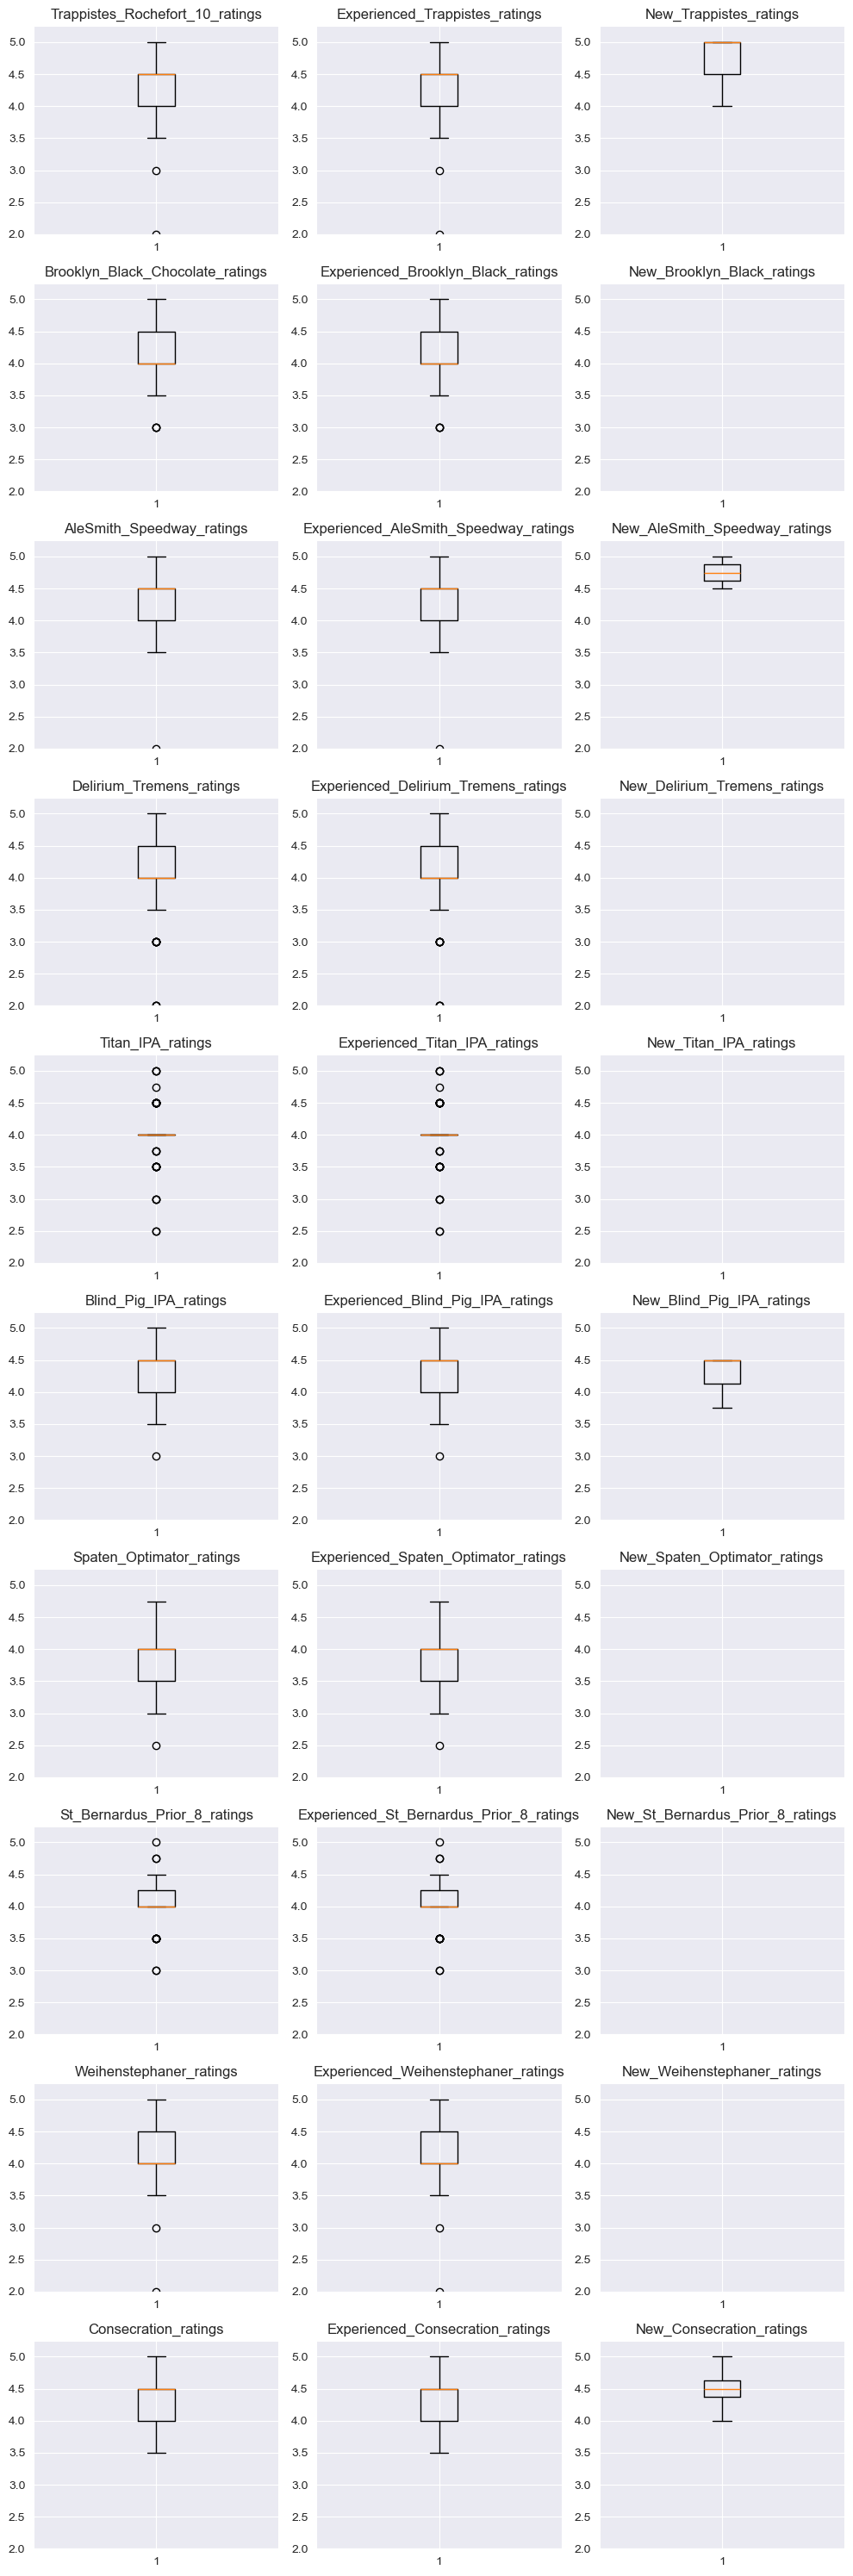

In [13]:
#The following code creates boxplots to show the distribution fo ratings for each beer type for all, experienced and new reviewers.
fig, axes = plt.subplots(10, 3, figsize=(10, 30)) #This allows for the display of the results in subplots

#To be used in the for loops, a list of the names to find the relevant data was needed. The paragraphe below is just the collection of used names to create each boxplot.
Top_10_Beer_types = ['Trappistes_Rochefort_10_ratings', 'Brooklyn_Black_Chocolate_ratings','AleSmith_Speedway_ratings','Delirium_Tremens_ratings','Titan_IPA_ratings','Blind_Pig_IPA_ratings','Spaten_Optimator_ratings','St_Bernardus_Prior_8_ratings','Weihenstephaner_ratings','Consecration_ratings']
Experienced_Top_10_Beer_types = ['Experienced_Trappistes_ratings', 'Experienced_Brooklyn_Black_ratings','Experienced_AleSmith_Speedway_ratings','Experienced_Delirium_Tremens_ratings','Experienced_Titan_IPA_ratings','Experienced_Blind_Pig_IPA_ratings','Experienced_Spaten_Optimator_ratings','Experienced_St_Bernardus_Prior_8_ratings','Experienced_Weihenstephaner_ratings','Experienced_Consecration_ratings']
New_Top_10_Beer_types = ['New_Trappistes_ratings', 'New_Brooklyn_Black_ratings','New_AleSmith_Speedway_ratings','New_Delirium_Tremens_ratings','New_Titan_IPA_ratings','New_Blind_Pig_IPA_ratings','New_Spaten_Optimator_ratings','New_St_Bernardus_Prior_8_ratings','New_Weihenstephaner_ratings','New_Consecration_ratings']
boxplot_placement = -1

#Plotting for all reviewers
for BeerType in Top_10_Beer_types:
    boxplot_placement += 1
    data_top10_beer = eval(BeerType) #eval allows to find the beer using its name as a string
    axes[boxplot_placement,0].boxplot(data_top10_beer['ratings'])
    axes[boxplot_placement,0].set_ylim(2,5.25)
    axes[boxplot_placement,0].set_title(f'{BeerType}')
#Plotting for Experienced reviewers
boxplot_placement = -1
for BeerType in Experienced_Top_10_Beer_types:
    boxplot_placement += 1
    data_top10_experiencedbeer = eval(BeerType)
    axes[boxplot_placement,1].boxplot(data_top10_experiencedbeer['ratings'])
    axes[boxplot_placement,1].set_ylim(2,5.25)
    axes[boxplot_placement,1].set_title(f'{BeerType}')
#Plotting for New reviewers
boxplot_placement = -1
for BeerType in New_Top_10_Beer_types:
    boxplot_placement += 1
    data_top10_newbeer = eval(BeerType)
    axes[boxplot_placement,2].boxplot(data_top10_newbeer['ratings'])
    axes[boxplot_placement,2].set_ylim(2,5.25)
    axes[boxplot_placement,2].set_title(f'{BeerType}')
    
#Information to properly display plots
plt.tight_layout() #Helps spacing plots
plt.show()

In [14]:
#The threshold of 15 reviews to be considered as experienced filters the majority of reviewers and in some cases amongst the top 10 most rated beers there are no new reviewers. The data is therefore dominated by the >= reviewers. Changing the threshold to 150 could provide a greater distinction between reviewers.

#Starting here by finding the number of experienced/new reviewers in the matched dataset BeerAdvocate merged with the users
ratings_reviews_merged
New_ratings = ratings_reviews_merged[ratings_reviews_merged["nb_ratings"] < experience_threshold]
print('BeerAdvocate new users matched')
print(New_ratings.shape)
#There are only 169 reviewers that have given less than 15 reviews in the matched BeerAdvocate
Experienced_ratings_matched = ratings_reviews_merged[ratings_reviews_merged["nb_ratings"] >= experience_threshold]
print('BeerAdvocate experienced users matched')
print(Experienced_ratings_matched.shape)
#With 17769 reviewers that have more than 15 given reviews it is clear experienced users dominate across the matched BeerAdvocate dataset

BeerAdvocate new users matched
(169, 4)
BeerAdvocate experienced users matched
(17769, 4)


In [15]:
#Checking if this is the case for the non-matched data for BeerAdvocate.
BeerAdvocateUsers_df = pd.read_csv(r'data/BeerAdvocate/users.csv')
New_BeerAdvocateUsers = BeerAdvocateUsers_df[BeerAdvocateUsers_df['nbr_ratings'] < experience_threshold]
print('BeerAdvocate new reviewers')
print(New_BeerAdvocateUsers.shape)
#There are 112759 new reviewers.
Experienced_BeerAdvocateUsers = BeerAdvocateUsers_df[BeerAdvocateUsers_df['nbr_ratings'] >= experience_threshold]
print('BeerAdvocate experienced reviewers')
print(Experienced_BeerAdvocateUsers.shape)
#There are 39945 experienced reviewers in the original data of BeerAdvocate

#This means the matching is responsible for the loss of most of these reviewers. It is possible that data that BeerAdvocate has more than RateBeer was lost during the matching. If this is the case then RateBeer should have little loss of data. Otherwise, it is also possible that only beer rated on both sites are matched thus both datasets actually lost much of their original data.

BeerAdvocate new reviewers
(113759, 6)
BeerAdvocate experienced reviewers
(39945, 6)


In [16]:
#Checking similarly for RateBeer starting with the matched data. To do so, the previously done filtering for the matched BeerAdvocate must be done again for the matched RateBeer data.
#Thus:
#1) The following code creates a new datasets that includes ratings, user_id and beer_name. The dataset is filtered from nan values and its 'object(1)' type of ratings are converted to numerical values.
filtered_df_ratings_beers = df_matched_ratings_beers.dropna()

filtered_overall_beers_ratings_df = pd.DataFrame ({
    'user_id': filtered_df_ratings_beers['rb.14'],
    'ratings': filtered_df_ratings_beers['rb.8'],
    'beer_id': filtered_df_ratings_beers['rb.4']
})

Overall_matched_RateBeer_df= filtered_overall_beers_ratings_df.drop(0) #Removing first string row which holds no values

#Converting to numerical values:
Overall_matched_RateBeer_df['ratings'] = pd.to_numeric(Overall_matched_RateBeer_df['ratings'], errors='coerce')
print(Overall_matched_RateBeer_df['ratings'].info())

#2) Filtering of the users.csv dataset and merging with the Overall_userid_beers_ratings_df via users_id
#Creating new dataset to include the RateBeer data
users_ratebeer_df = pd.read_csv(r'data/matched_beer_data/users.csv')
#Creating a separate df containing only the wanted columns of rb.2 (nbr_ratings), rb.3 (user_id)
users_ratebeer_df = pd.DataFrame ({
    'nbr_ratings': users['rb.2'],
    'user_id': users['rb.3']
})
users_ratebeer_df= users_ratebeer_df.drop(0) #Removing first string row which holds no values

#Merging with Overall_matched_RateBeer_df using the 'user_id' column
ratings_RateBeer_merged = pd.merge(users_ratebeer_df, Overall_matched_RateBeer_df, on='user_id')

#Conversion to numerical as again values are classified as object(1)
ratings_RateBeer_merged['nbr_ratings'] = pd.to_numeric(ratings_RateBeer_merged['nbr_ratings'], errors='coerce')
#'.info' shows that the nb_ratings column now contains inter64.

print(users_ratebeer_df)

<class 'pandas.core.series.Series'>
Index: 17938 entries, 1 to 21964
Series name: ratings
Non-Null Count  Dtype  
--------------  -----  
17938 non-null  float64
dtypes: float64(1)
memory usage: 280.3 KB
None
     nbr_ratings user_id
1           8781   83106
2           6240  290599
3           7452   38859
4           5462   91324
5           1096  368991
...          ...     ...
3016           1   99346
3017           1   33393
3018           1   15553
3019           1  327965
3020           1   51723

[3020 rows x 2 columns]


In [17]:
#Now checking similarly for the matched data of RateBeer.
New_RateBeerUsers_matched = ratings_RateBeer_merged[ratings_RateBeer_merged['nbr_ratings'] < experience_threshold]
print('RateBeer new reviewers matched')
print(New_RateBeerUsers_matched.shape)
#There are 245 new users
Experienced_RateBeerUsers_matched = ratings_RateBeer_merged[ratings_RateBeer_merged['nbr_ratings'] >= experience_threshold]
print('RateBeer experienced reviewers matched')
print(Experienced_RateBeerUsers_matched.shape)
#There are 17693 experienced users

#Now checking similarly for the non-matched data of RateBeer.
RateBeerUsers_df = pd.read_csv(r'data/RateBeer/users.csv')
New_RateBeerUsers = RateBeerUsers_df[RateBeerUsers_df['nbr_ratings'] < experience_threshold]
print('RateBeer new reviewers')
print(New_RateBeerUsers.shape)
#There are 55834 new users
Experienced_RateBeerUsers = RateBeerUsers_df[RateBeerUsers_df['nbr_ratings'] >= experience_threshold]
print('RateBeer experienced reviewers')
print(Experienced_RateBeerUsers.shape)

RateBeer new reviewers matched
(245, 4)
RateBeer experienced reviewers matched
(17693, 4)
RateBeer new reviewers
(55834, 5)
RateBeer experienced reviewers
(14340, 5)


In [18]:
print('BeerAdvocate new matched','|' 'RateBeer new matched')
print(New_ratings.shape, New_RateBeerUsers_matched.shape)
print('BeerAdvocate experienced matched', '|', 'RateBeer experienced matched')
print(Experienced_ratings_matched.shape, Experienced_RateBeerUsers_matched.shape)
print(30*'-')
print('BeerAdvocate new', '|', 'RateBeer new')
print(New_BeerAdvocateUsers.shape,New_RateBeerUsers.shape)
print('BeerAdvocate experienced', '|', 'RateBeer experienced')
print(Experienced_BeerAdvocateUsers.shape,Experienced_RateBeerUsers.shape)

BeerAdvocate new matched |RateBeer new matched
(169, 4) (245, 4)
BeerAdvocate experienced matched | RateBeer experienced matched
(17769, 4) (17693, 4)
------------------------------
BeerAdvocate new | RateBeer new
(113759, 6) (55834, 5)
BeerAdvocate experienced | RateBeer experienced
(39945, 6) (14340, 5)


In [19]:
#Testing results with BA and RB csv documents
BA_ratings_df = pd.read_csv(r'data/matched_beer_data/BA_ratings.csv') #Contains BA ratings
#BA_reviews_df = pd.read_csv(r'data/matched_beer_data/BA_reviews.csv')
RB_ratings_df = pd.read_csv(r'data/matched_beer_data/RB_ratings.csv') #Contains RB ratings
#RB_reviews_df = pd.read_csv(r'data/matched_beer_data/RB_reviews.csv')

In [177]:
#Reading the relevant users data to find the number of ratings per reviewer for BeerAdvocate and RateBeer
users_BeerAdvocate_df = pd.read_csv(r'data/BeerAdvocate/users.csv')
users_RateBeer_df = pd.read_csv(r'data/RateBeer/users.csv')

In [21]:
#There is more data on the rating df, thus these are the ones used for the following analysis
print(BA_ratings_df.shape)
print(RB_ratings_df.shape)
#print(BA_reviews_df.shape)
#print(RB_reviews_df.shape)

(8393032, 17)
(7122074, 16)
(2589586, 16)
(7122074, 16)


In [76]:
#Selecting the wanted columns and creating new df for BeerAdvocate and RateBeer for ratings:
BA_only_ratings_df = pd.DataFrame ({
    'user_id': BA_ratings_df['user_id'],
    'ratings': BA_ratings_df['rating'],
    'beer_id': BA_ratings_df['beer_id'],
    'beer_name': BA_ratings_df['beer_name']
})
#For RB adding the name of reviewers to facilitate reading of the ids which are only numerical values in these datasets
RB_only_ratings_df = pd.DataFrame ({
    'user_id': RB_ratings_df['user_id'],
    'user_name':RB_ratings_df['user_name'],
    'ratings': RB_ratings_df['rating'],
    'beer_id': RB_ratings_df['beer_id'],
    'beer_name':RB_ratings_df['beer_name']
})
#And new df for the reviewers to have the number of given ratings per reviewer
BA_users_df = pd.DataFrame ({
    'nb_ratings': users_BeerAdvocate_df['nbr_ratings'],
    'user_id': users_BeerAdvocate_df['user_id'],
})
RB_users_df = pd.DataFrame ({
    'nb_ratings': users_RateBeer_df['nbr_ratings'],
    'user_id': users_RateBeer_df['user_id']
})

#Merging BA and RB ratings with the respective BA and RB users_df using the 'user_id' column
BA_only_ratings_df = pd.merge(BA_users_df, BA_only_ratings_df, on='user_id')
RB_only_ratings_df = pd.merge(RB_users_df, RB_only_ratings_df, on='user_id')

In the following code, the objective is to work on the 10 most popular beer types and see if a difference of ratings between experienced (defined as a certain amount of given ratings) and new reviewers can be seen per type of beer. This also aims to see which type of reviewer (new/experienced) dominates the ratings for a small sample of beers. The popular beers were selected (defined as the most reviewed beers from the BeerAdvocate and RateBeer datasets) to have enough data for the analysis.

In [124]:
#Classifying by the number of reviews per beer for BA and RB
valuecount_BA = pd.DataFrame(BA_only_ratings_df['beer_name'].value_counts().reset_index())
valuecount_BA.columns = ['beer_name', 'count']
valuecount_RB = pd.DataFrame(RB_only_ratings_df['beer_name'].value_counts().reset_index())
valuecount_RB.columns = ['beer_name', 'count']
#Saving the 10 most reviewed beers
Top_10_beers_BA = valuecount_BA.head(10)
Top_10_beers_RB = valuecount_RB.head(10)

In [134]:
#Selecting the rows from BA and RB ratings that match with the Top_10 BA and RB respectively
BA_Top10_ratings_df = BA_only_ratings_df[BA_only_ratings_df['beer_name'].isin(Top_10_beers_BA['beer_name'])]
RB_Top10_ratings_df = RB_only_ratings_df[RB_only_ratings_df['beer_name'].isin(Top_10_beers_RB['beer_name'])]

In [176]:
#Sharing the BA and RB Top10_ratings between experienced and new reviewers. The experience_threshold is used as separation
experience_threshold = 15 #Can be changed. Defines experience
#Sharing for BA
Experienced_BA = BA_Top10_ratings_df[BA_Top10_ratings_df['nb_ratings'].apply(lambda x: x >= experience_threshold)]
New_BA = BA_Top10_ratings_df[BA_Top10_ratings_df['nb_ratings'].apply(lambda x: x < experience_threshold)]
#Sharing for RB
Experienced_RB = RB_Top10_ratings_df[RB_Top10_ratings_df['nb_ratings'].apply(lambda x: x >= experience_threshold)]
New_RB = RB_Top10_ratings_df[RB_Top10_ratings_df['nb_ratings'].apply(lambda x: x < experience_threshold)]

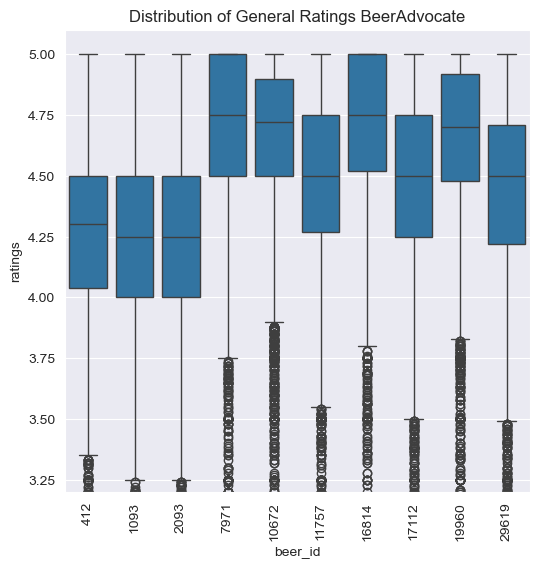

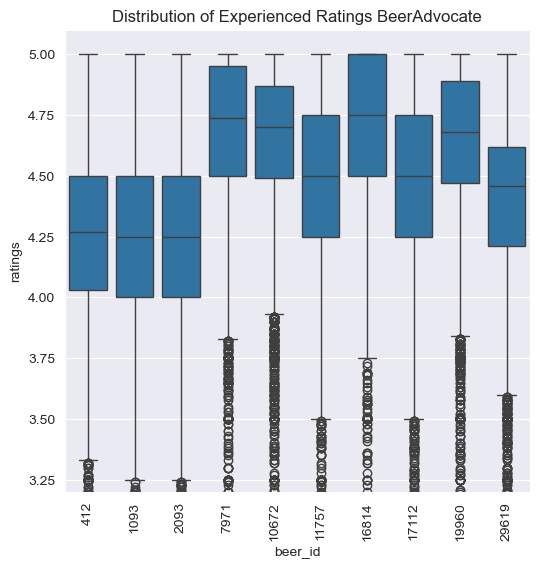

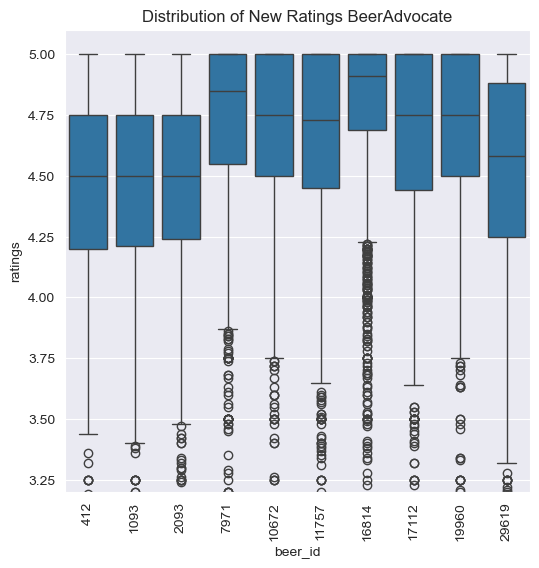

In [172]:
#Plotting for BeerAdvocate, the top 10 most reviewed beers for all (general), experienced and new reviewers (using the threshold of 15 reviews to define experience)

plt.figure(figsize=(6, 6))
sns.boxplot(x='beer_id', y='ratings', data=BA_Top10_ratings_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.ylim(3.2,5.1)
plt.title('Distribution of General Ratings BeerAdvocate')
plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(x='beer_id', y='ratings', data=Experienced_BA)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.ylim(3.2,5.1)
plt.title('Distribution of Experienced Ratings BeerAdvocate')
plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(x='beer_id', y='ratings', data=New_BA)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.ylim(3.2,5.1)
plt.title('Distribution of New Ratings BeerAdvocate')
plt.show()

#Results: These results show that the Experienced reviewers' ratings tend to follow the general distribution of ratings with only for one beer rating worse than the general ratings. In contrast, New reviewers tend to rate consistently higher the different beer types. Better ratings with fewer reviews was not observed before from the general trend of ratings per given reviews for all beers. However, the tendency of New reviewers' grades to be more extreme is observed by having ratings closer to excellent.

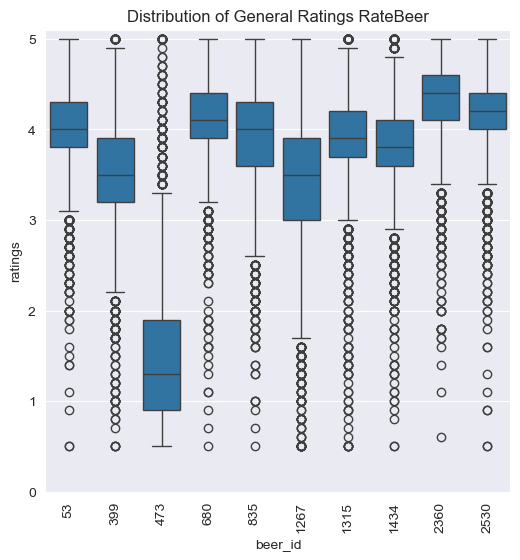

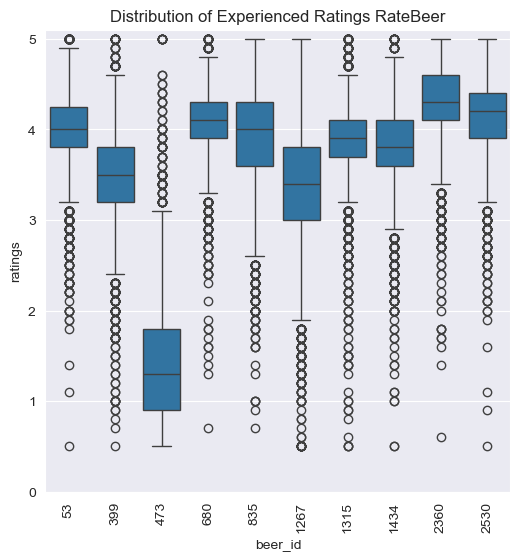

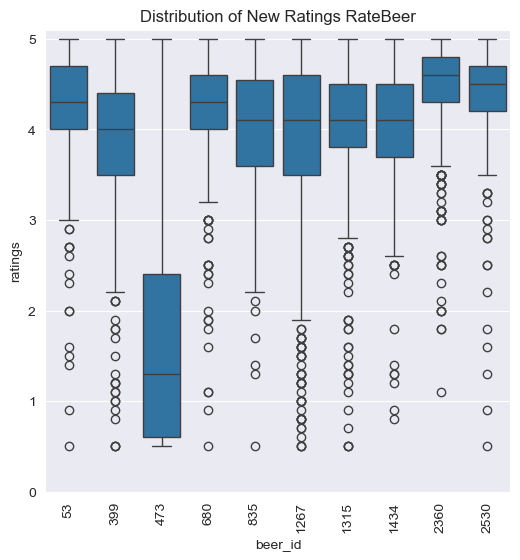

In [175]:
#Plotting for RateBeer, the top 10 most reviewed beers for all (general), experienced and new reviewers (using the threshold of 15 reviews to define experience)

plt.figure(figsize=(6, 6))
sns.boxplot(x='beer_id', y='ratings', data=RB_Top10_ratings_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.ylim(0,5.1)
plt.title('Distribution of General Ratings RateBeer')
plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(x='beer_id', y='ratings', data=Experienced_RB)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.ylim(0,5.1)
plt.title('Distribution of Experienced Ratings RateBeer')
plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(x='beer_id', y='ratings', data=New_RB)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.ylim(0,5.1)
plt.title('Distribution of New Ratings RateBeer')
plt.show()

#Results: The results of RateBeer appear less concentrated. Experienced reviewers have more concentrated results near the median. New reviewers appear to rate higher the different beers, notably for beer_id 2360 and 1267. In part, this seemingly bette rating is due to more spread-out results around the median. Ratings for New reviewers reach both more often high and low ratings which correspond to the general trend observed when mixing all beers. As with BeerAdvocate, RateBeer general ratings seem to more closely follow the Experienced reviewers' scores.